In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


Проверяем формат столбцов

In [3]:
# Просмотр размерности таблицы
df.shape

(301355, 5)

In [4]:
# Просмотр информации о файле
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301355 entries, 0 to 301354
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Дата          301355 non-null  object
 1   Склад         301355 non-null  int64 
 2   Контрагент    301355 non-null  object
 3   Номенклатура  301355 non-null  object
 4   Количество    301355 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.5+ MB


Сразу переведем столбец "Дата" в правильный формат

In [5]:
# Преобразуем столбец "Дата" в формат datetime
df["Дата"] = pd.to_datetime(df["Дата"], format="%Y-%m-%d", errors='coerce')

# Проверяем результат
print(df.info())  # Должно показать тип данных datetime64
df.head()  # Проверяем первые строки

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301355 entries, 0 to 301354
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Дата          301355 non-null  datetime64[ns]
 1   Склад         301355 non-null  int64         
 2   Контрагент    301355 non-null  object        
 3   Номенклатура  301355 non-null  object        
 4   Количество    301355 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 11.5+ MB
None


,Дата,Склад,Контрагент,Номенклатура,Количество
0,2018-01-04,1,address_0,product_0,4
1,2018-01-04,1,address_0,product_1,4
2,2018-01-04,1,address_0,product_2,5
3,2018-01-04,1,address_0,product_3,10
4,2018-01-04,1,address_0,product_4,2


Сгруппируйте данные по дате, посчитайте количество продаж

In [6]:
# Группируем по дате и считаем количество продаж
grouped_df = df.groupby("Дата").size().reset_index(name="Количество продаж")

In [7]:
grouped_df.shape

(205, 2)

Вывести несколько первых строк сгруппированных данных

In [8]:
grouped_df.head()

,Дата,Количество продаж
0,2018-01-04,1840
1,2018-01-05,1301
2,2018-01-06,1306
3,2018-01-07,1322
4,2018-01-09,1719


Нарисуйте график продаж у `grouped_df`

In [9]:
grouped_df["Количество продаж"].agg([min, max])

C:\Users\Anna Vlassenko\AppData\Local\Temp\ipykernel_29896\893863976.py:1: FutureWarning: The provided callable <built-in function min> is currently using Series.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  grouped_df["Количество продаж"].agg([min, max])
C:\Users\Anna Vlassenko\AppData\Local\Temp\ipykernel_29896\893863976.py:1: FutureWarning: The provided callable <built-in function max> is currently using Series.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  grouped_df["Количество продаж"].agg([min, max])


min    1164
max    1840
Name: Количество продаж, dtype: int64

<Figure size 800x600 with 0 Axes>

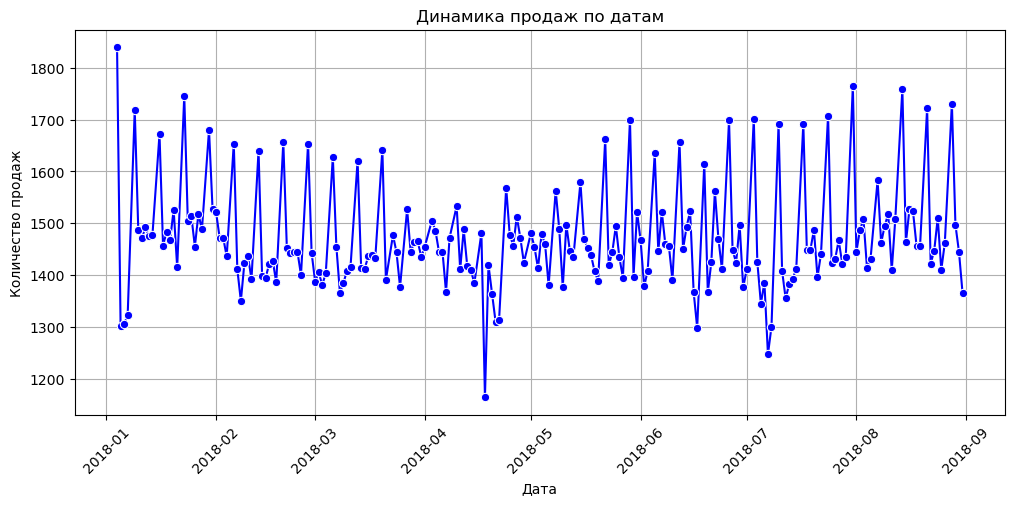

In [11]:
# Построение столбчатой диаграммы
plt.figure(figsize=(8, 6))

# Группируем данные только по дате, суммируя продажи
sales_trend = grouped_df.groupby("Дата")["Количество продаж"].sum().reset_index()

# Строим график
plt.figure(figsize=(12, 5))
sns.lineplot(data=sales_trend, x="Дата", y="Количество продаж", marker="o", color="blue")

# Оформление графика
plt.xlabel("Дата")
plt.ylabel("Количество продаж")
plt.title("Динамика продаж по датам")
plt.xticks(rotation=45)  # Поворачиваем подписи дат для удобства
plt.grid(True)

plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

In [100]:
print(f"В начале января был максимумв продажах {sales_trend["Количество продаж"].max()}, а в середине апреля был минимум {sales_trend["Количество продаж"].min()}, а так видно по графику в основном продажи средние {round(sales_trend["Количество продаж"].mean(), 2)}.")

В начале января был максимумв продажах 1840, а в середине апреля был минимум 1164, а так видно по графику в основном продажи средние 1470.02.


Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [12]:
# Рассчитываем межквартильный размах (IQR)
Q1 = df["Количество"].quantile(0.25)  # 25-й процентиль
Q3 = df["Количество"].quantile(0.75)  # 75-й процентиль
IQR = Q3 - Q1  # Межквартильный размах

# Определяем границы выбросов
lower_bound = Q1 - 1.5 * IQR  # Нижняя граница
upper_bound = Q3 + 1.5 * IQR  # Верхняя граница

# Находим строки, где "Количество продаж" выходит за верхнюю границу (максимальный выброс)
outliers = df[df["Количество"] > upper_bound]

# Находим строку с максимальным выбросом
max_outlier = outliers.loc[outliers["Количество"].idxmax()]

# Выводим строку с максимальным выбросом
print(max_outlier)

Дата            2018-06-28 00:00:00
Склад                             1
Контрагент              address_208
Номенклатура              product_0
Количество                      200
Name: 218822, dtype: object


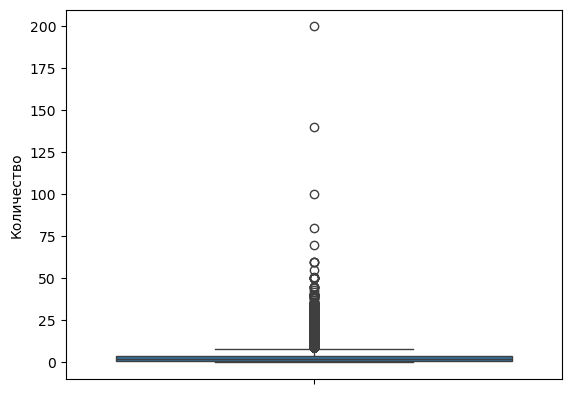

In [57]:
sns.boxplot(y=df["Количество"])
plt.show()

Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [13]:
# Фильтруем данные: только июнь, июль, август и только среда
filtered_df = df[
    (df["Дата"].dt.month.isin([6, 7, 8])) &  # Только летние месяцы
    (df["Дата"].dt.weekday == 2) &  # Только среда (0 - Пн, 1 - Вт, 2 - Ср, ...)
    (df["Склад"] == 3)  # Только 3-й склад
]

# Группируем по номенклатуре и суммируем количество продаж
top_product = (
    filtered_df.groupby("Номенклатура")["Количество"]
    .sum()
    .idxmax()
)

# Выводим результат
print(f"Топовый товар по продажам по средам за июнь-август на 3-м складе: {top_product}")

Топовый товар по продажам по средам за июнь-август на 3-м складе: product_1


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [89]:
# Проверка в колонке Дата мин и мак значение
print(f" Начальная дата продаж {grouped_df["Дата"].min()}\n Последняя дата продаж {grouped_df["Дата"].max()}")

 Начальная дата продаж 2018-01-04 00:00:00
 Последняя дата продаж 2018-08-31 00:00:00


In [49]:
# Считываем файл скаченный с сайта
temperature = pd.read_excel('Temperature_04.01.2018-31.08.2018.xlsx')

In [ ]:
# Просмотр информации о температуре в Астане

In [50]:
temperature.shape

(1918, 29)

In [51]:
temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1918 entries, 0 to 1917
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Местное время в Астане  1918 non-null   object 
 1   T                       1918 non-null   float64
 2   Po                      1918 non-null   float64
 3   P                       1918 non-null   float64
 4   Pa                      1915 non-null   float64
 5   U                       1917 non-null   float64
 6   DD                      1918 non-null   object 
 7   Ff                      1918 non-null   int64  
 8   ff10                    15 non-null     float64
 9   ff3                     51 non-null     float64
 10  N                       1916 non-null   object 
 11  WW                      1918 non-null   object 
 12  W1                      689 non-null    object 
 13  W2                      689 non-null    object 
 14  Tn                      240 non-null    

In [90]:
temperature.isnull().sum()

Местное время в Астане       0
T                            0
Po                           0
P                            0
Pa                           3
U                            1
DD                           0
Ff                           0
ff10                      1903
ff3                       1867
N                            2
WW                           0
W1                        1229
W2                        1229
Tn                        1678
Tx                        1439
Cl                         502
Nh                         502
H                          500
Cm                         798
Ch                        1041
VV                         699
Td                           1
RRR                       1500
tR                        1500
E                         1782
Tg                        1800
E'                        1825
sss                       1825
Дата                         0
dtype: int64

In [52]:
temperature.head()

,Местное время в Астане,T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
0,31.08.2018 23:00,8.2,736.6,768.3,0.2,78.0,"Ветер, дующий с северо-востока",4,NaN,NaN,...,"Высококучевых, высокослоистых или слоисто-дожд...","Перистых, перисто-кучевых или перисто-слоистых...",NaN,4.6,Следы осадков,12.0,NaN,NaN,NaN,NaN
1,31.08.2018 20:00,9.6,736.4,767.9,1.2,88.0,"Ветер, дующий с западо-северо-запада",3,NaN,NaN,...,"Высококучевых, высокослоистых или слоисто-дожд...","Перистых, перисто-кучевых или перисто-слоистых...",NaN,7.7,Следы осадков,12.0,NaN,NaN,NaN,NaN
2,31.08.2018 17:00,11.3,735.2,766.4,0.4,83.0,"Ветер, дующий с востоко-северо-востока",4,NaN,NaN,...,NaN,NaN,10.0,8.5,NaN,NaN,NaN,NaN,NaN,NaN
3,31.08.2018 14:00,12.3,734.8,765.9,0.9,80.0,"Ветер, дующий с северо-востока",4,NaN,NaN,...,NaN,NaN,4.0,8.9,NaN,NaN,NaN,NaN,NaN,NaN
4,31.08.2018 11:00,13.2,733.9,764.8,1.0,83.0,"Ветер, дующий с северо-северо-востока",4,NaN,NaN,...,NaN,NaN,10.0,10.3,3,12.0,NaN,NaN,NaN,NaN


In [53]:
# Преобразуем дату в формат datetime
temperature["Местное время в Астане"] = pd.to_datetime(temperature["Местное время в Астане"], format="%d.%m.%Y %H:%M")
# Добавляем новые столбцы: день и месяц
temperature["Дата"] = temperature["Местное время в Астане"].dt.date  # Только дата (без времени)

In [54]:
# Средняя температура по дням
avg_temp_by_day = temperature.groupby("Дата")["T"].mean().reset_index()
print("Средняя температура по дням:\n", avg_temp_by_day.head())

Средняя температура по дням:
          Дата        T
0  2018-01-04 -14.0750
1  2018-01-05 -16.8625
2  2018-01-06 -13.3000
3  2018-01-07 -12.7500
4  2018-01-08 -15.4125


In [55]:
avg_temp_by_day.shape

(240, 2)

In [57]:
avg_temp_by_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Дата    240 non-null    object 
 1   T       240 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.9+ KB


In [58]:
# Преобразуем столбец "Дата" в формат datetime
avg_temp_by_day["Дата"] = pd.to_datetime(avg_temp_by_day["Дата"], format="%Y-%m-%d", errors='coerce')

In [59]:
avg_temp_by_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Дата    240 non-null    datetime64[ns]
 1   T       240 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.9 KB


In [91]:
# Объединяем таблицы по дате левое соединение 
merged_df = pd.merge(grouped_df, avg_temp_by_day[["Дата", "T"]], on="Дата", how="left")

In [67]:
# Просмотр информации о полученной таблице
merged_df.isnull().sum()

Дата                 0
Количество продаж    0
T                    0
dtype: int64

In [92]:
merged_df 

,Дата,Количество продаж,T
0,2018-01-04,1840,-14.0750
1,2018-01-05,1301,-16.8625
2,2018-01-06,1306,-13.3000
3,2018-01-07,1322,-12.7500
4,2018-01-09,1719,-6.2500
...,...,...,...
200,2018-08-26,1462,11.9750
201,2018-08-28,1731,14.1125
202,2018-08-29,1497,13.8250
203,2018-08-30,1445,14.1750


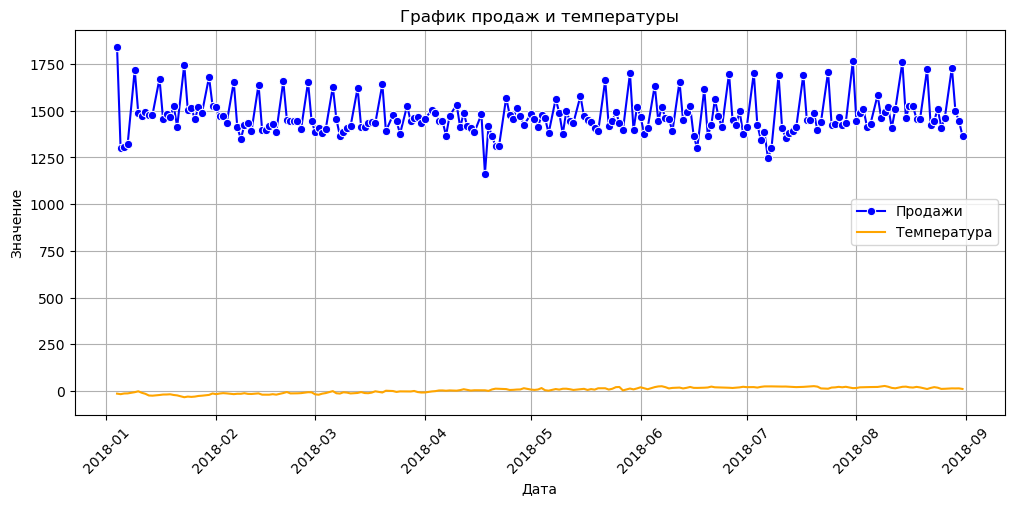

In [93]:
# 1 График "Количество продаж" и "Температура" на одной оси
plt.figure(figsize=(12, 5))
sns.lineplot(data=merged_df, x="Дата", y="Количество продаж", marker="o", color="blue", label="Продажи")
sns.lineplot(data=merged_df, x="Дата", y="T", color="orange", label="Температура")

plt.xlabel("Дата")
plt.ylabel("Значение")
plt.title("График продаж и температуры")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

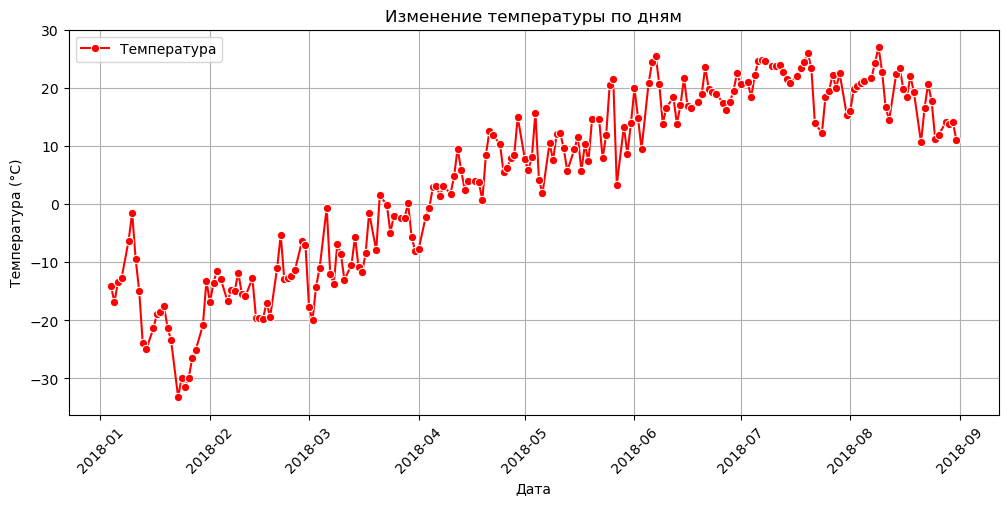

In [87]:
# График температуры отдельно
plt.figure(figsize=(12, 5))
sns.lineplot(data=merged_df, x="Дата", y="T", marker="o", color="red", label="Температура")

plt.xlabel("Дата")
plt.ylabel("Температура (°C)")
plt.title("Изменение температуры по дням")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()